# **Ödev 1:Fonksiyonlara Özellik ve Docstring Ekleme**

## **Görev 1: Fonksiyona Parametre Ekleme**

cat_summary() fonksiyonuna 1 özellik ekleyiniz. Bu özellik argümanla biçimlendirilebilir olsun. Var olan
özelliği de argümanla kontrol edilebilir hale getirebilirsiniz.

 **Öncesin de gerekli kütüphaneleri yükleyelim ve çıktı görüntüsü için bazı ayarlar yapalım.**

In [517]:
# Numerik hesaplamalar yapabilmek için.
import numpy as np

# Ver manipülasyonu ve analizi için.
import pandas as pd

# Veri setleri ve grafik çizdirmek için.
import seaborn as sns

# Grafik çizdirmek için.
import matplotlib.pyplot as plt

# Çıktı Ayarlamaları İçin
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.float_format", lambda x: "%3.f" % x)
pd.options.display.float_format = '{:,.3f}'.format
pd.set_option("display.width", 5000)

**Ver setimizi yükleyelim.**

In [518]:
df = sns.load_dataset("titanic")

In [519]:
# Kategorik Değişkenler: cat_cols & num_but_car
cat_cols = [col for col in df.columns if str(df[col].dtypes) in ["category", "bool", "object"]]
num_but_cat = [col for col in df.columns if (df[col].nunique() < 10) and (df[col].dtypes in ["int64", "float64"])] 
cat_but_car = [col for col in df.columns if (df[col].nunique() > 20) and str(df[col].dtypes) in ["category", "object"]]
cat_cols += num_but_cat
cat_cols = [col for col in cat_cols if col not in cat_but_car]

Biz özellik olarak sns kütüphanesinin countplot grafiğinin yanı sıra matplotlib kütüphanesinin içinde yer alan bar grafiğini çizdirelim.

In [520]:
def cat_summary(dataframe, col_name, plot1 = False, plot2=False):
  print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                      "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
  print("#########################################")
  if plot1:
    sns.countplot(x = dataframe[col_name], data = dataframe);
    plt.show(block=True)
  print()
  if plot2:
    df[col_name].value_counts().plot(kind="bar");
    plt.show(block=True);

        sex  Ratio
male    577 64.759
female  314 35.241
#########################################


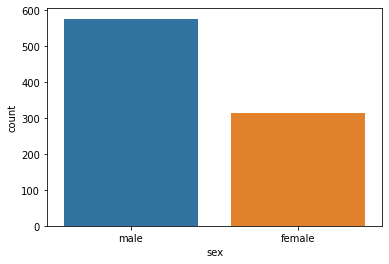

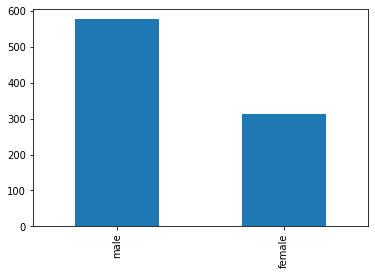

In [521]:
cat_summary(df, "sex", plot1=True, plot2=True)

* Tüm kategorik değişkenelr üzerinde bunu çalıştıralım.
* Tabi önce veri tipi bool olan değişkenlerin veri tiplerini int yapalım.

        sex  Ratio
male    577 64.759
female  314 35.241
#########################################


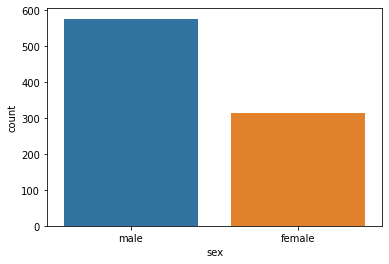

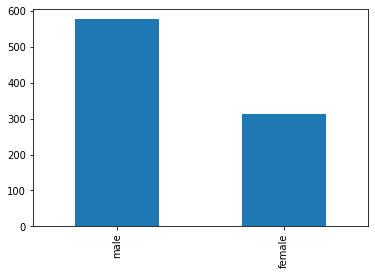

   embarked  Ratio
S       644 72.278
C       168 18.855
Q        77  8.642
#########################################


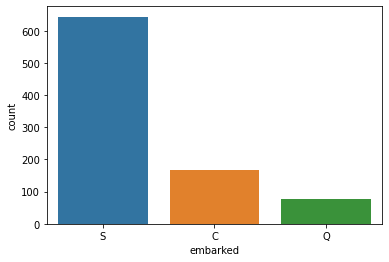

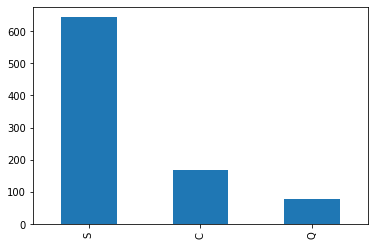

        class  Ratio
Third     491 55.107
First     216 24.242
Second    184 20.651
#########################################


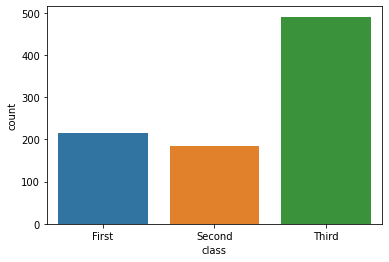

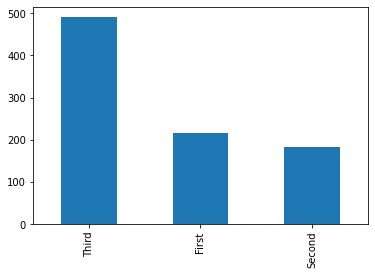

       who  Ratio
man    537 60.269
woman  271 30.415
child   83  9.315
#########################################


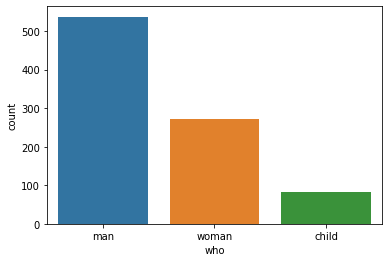

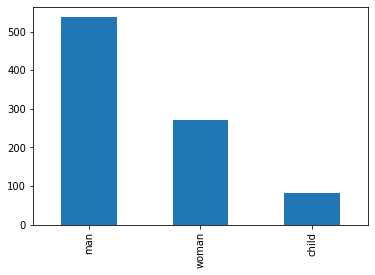

   adult_male  Ratio
1         537 60.269
0         354 39.731
#########################################


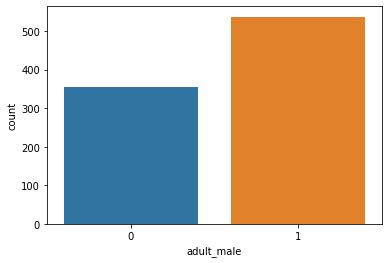

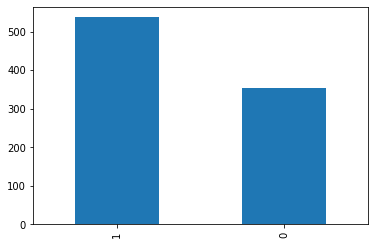

   deck  Ratio
C    59  6.622
B    47  5.275
D    33  3.704
E    32  3.591
A    15  1.684
F    13  1.459
G     4  0.449
#########################################


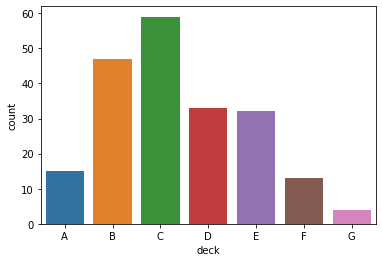

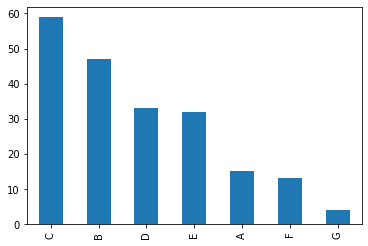

             embark_town  Ratio
Southampton          644 72.278
Cherbourg            168 18.855
Queenstown            77  8.642
#########################################


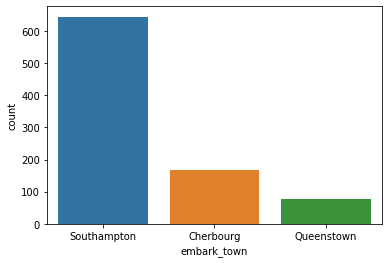

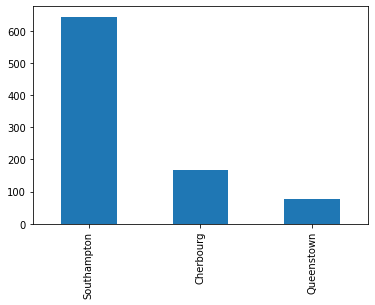

     alive  Ratio
no     549 61.616
yes    342 38.384
#########################################


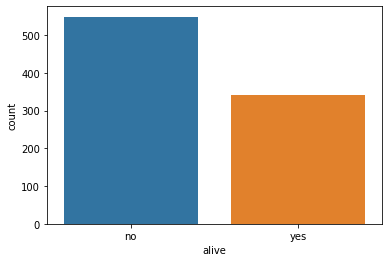

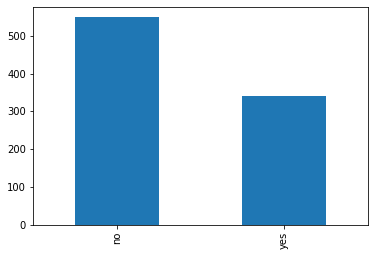

   alone  Ratio
1    537 60.269
0    354 39.731
#########################################


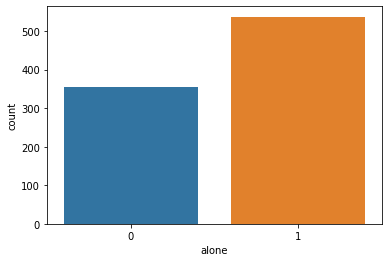

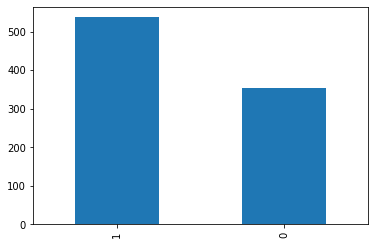

   survived  Ratio
0       549 61.616
1       342 38.384
#########################################


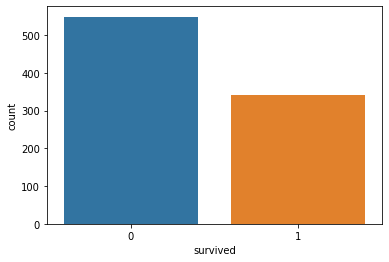

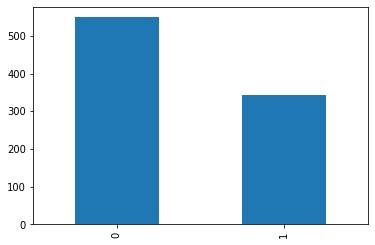

   pclass  Ratio
3     491 55.107
1     216 24.242
2     184 20.651
#########################################


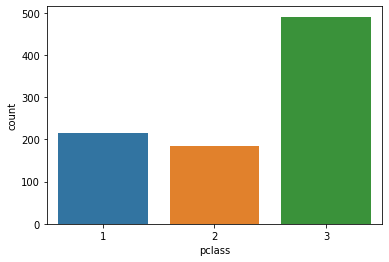

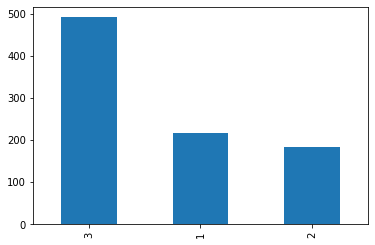

   sibsp  Ratio
0    608 68.238
1    209 23.457
2     28  3.143
4     18  2.020
3     16  1.796
8      7  0.786
5      5  0.561
#########################################


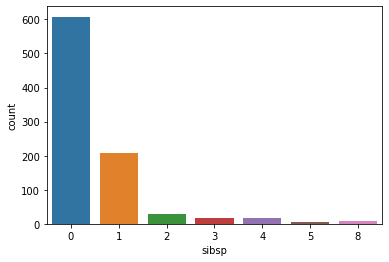

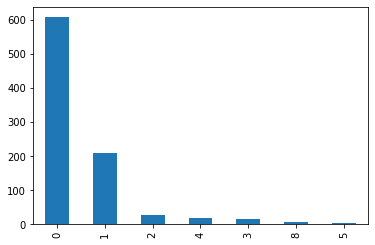

   parch  Ratio
0    678 76.094
1    118 13.244
2     80  8.979
5      5  0.561
3      5  0.561
4      4  0.449
6      1  0.112
#########################################


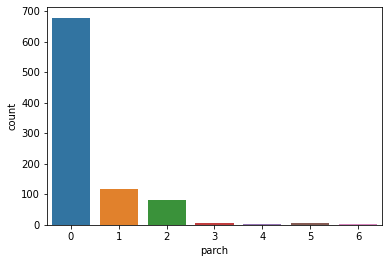

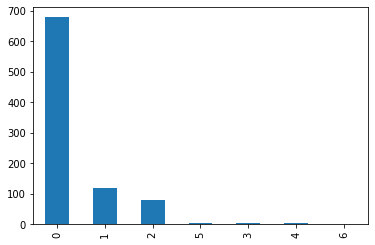

In [522]:
for col in cat_cols:
  if df[col].dtypes == "bool":
    df[col] = df[col].astype(int)
    cat_summary(df, col, plot1=True, plot2=True)
  else:
    cat_summary(df, col, plot1=True, plot2=True)

## **Görev 2:**

check_df(), cat_summary() fonksiyonlarına 4 bilgi (uygunsa) barındıran numpy tarzı docstring
yazınız. (task, params, return, example)

### **1. check_df() Fonksiyonu:**

In [523]:
def check_df(dataframe, head=5):
  """
  Veri setini genel hatlarıyla incelemek için (gözlem sayısı, değişken sayısı, ilk gözlemler, son gözlemler,
  veri setinde en az bir tane eksik değer var mı? (varsa True, yoksa False), değişken bazlı eksik değer sayıları ve son
  olarak sayısal değişkenlerin betimsel istatistikleri) oluşturulmuş bir fonksiyondur.

  Parameters
  ----------
  dataframe: dataframe
    İncelenmek istenen veri seti.

  head: int
    İncelenecek olan ilk ve son gözlemlerin biz istediğimiz sayıda gözlem getirmesi için head parametresi eklenmiştir.

  Returns


  Notes: Tüm çıktılar daha sonra kullanılmayacağı için sadece gözlemlemek istediğimiz için print ile alınmıştır.
  ______

  Examples
In [1]: check_df(df)

Out [1]:

###################### Shape ######################
(891, 15)
###################### Types ######################
survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male        int64
deck           category
embark_town      object
alive            object
alone             int64
dtype: object
###################### Head ######################
   survived  pclass     sex    age  sibsp  parch   fare embarked  class    who  adult_male deck  embark_town alive  alone
0         0       3    male 22.000      1      0  7.250        S  Third    man           1  NaN  Southampton    no      0
1         1       1  female 38.000      1      0 71.283        C  First  woman           0    C    Cherbourg   yes      0
2         1       3  female 26.000      0      0  7.925        S  Third  woman           0  NaN  Southampton   yes      1
3         1       1  female 35.000      1      0 53.100        S  First  woman           0    C  Southampton   yes      0
4         0       3    male 35.000      0      0  8.050        S  Third    man           1  NaN  Southampton    no      1
###################### Tail ######################
     survived  pclass     sex    age  sibsp  parch   fare embarked   class    who  adult_male deck  embark_town alive  alone
886         0       2    male 27.000      0      0 13.000        S  Second    man           1  NaN  Southampton    no      1
887         1       1  female 19.000      0      0 30.000        S   First  woman           0    B  Southampton   yes      1
888         0       3  female    NaN      1      2 23.450        S   Third  woman           0  NaN  Southampton    no      0
889         1       1    male 26.000      0      0 30.000        C   First    man           1    C    Cherbourg   yes      1
890         0       3    male 32.000      0      0  7.750        Q   Third    man           1  NaN   Queenstown    no      1
###################### NA ######################
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64
###################### Quantiles ######################
             count   mean    std   min    0%    5%    50%     95%    100%     max
survived   891.000  0.384  0.487 0.000 0.000 0.000  0.000   1.000   1.000   1.000
pclass     891.000  2.309  0.836 1.000 1.000 1.000  3.000   3.000   3.000   3.000
age        714.000 29.699 14.526 0.420 0.420 4.000 28.000  56.000  80.000  80.000
sibsp      891.000  0.523  1.103 0.000 0.000 0.000  0.000   3.000   8.000   8.000
parch      891.000  0.382  0.806 0.000 0.000 0.000  0.000   2.000   6.000   6.000
fare       891.000 32.204 49.693 0.000 0.000 7.225 14.454 112.079 512.329 512.329
adult_male 891.000  0.603  0.490 0.000 0.000 0.000  1.000   1.000   1.000   1.000
alone      891.000  0.603  0.490 0.000 0.000 0.000  1.000   1.000   1.000   1.000

  """
  print("###################### Shape ######################")
  print(dataframe.shape)

  print("###################### Types ######################")
  print(dataframe.dtypes)

  print("###################### Head ######################")
  print(dataframe.head(head))

  print("###################### Tail ######################")
  print(dataframe.tail(head))

  print("###################### NA ######################")
  print(dataframe.isnull().sum())

  print("###################### Quantiles ######################")
  print(dataframe.describe([0, 0.05, 0.50, 0.95, 1]).T)

In [524]:
check_df(df)

###################### Shape ######################
(891, 15)
###################### Types ######################
survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male        int64
deck           category
embark_town      object
alive            object
alone             int64
dtype: object
###################### Head ######################
   survived  pclass     sex    age  sibsp  parch   fare embarked  class    who  adult_male deck  embark_town alive  alone
0         0       3    male 22.000      1      0  7.250        S  Third    man           1  NaN  Southampton    no      0
1         1       1  female 38.000      1      0 71.283        C  First  woman           0    C    Cherbourg   yes      0
2         1       3  female 26.000      0      0  7.925        S  Third  woman           0  NaN

### **2.cat_summary() Fonksiyonu**

In [525]:
def cat_summary(dataframe, col_name, plot1 = False, plot2=False):
  """
  Bu fonksiyon kategorik değişkenleri analiz etmek için kullanılır. Kategorik değişkenin içinde yer alan sınıfları ve
  o sınıfın o değişken içindeki oranını görebilidiğiniz aynı zaman da hem matplotlib hem de seaborn kütüphanelerinden
  sütun grafiği ile görselleştirme özellikler opsiyon olarak eklenmiştir.

  Parameters
  ----------
  dataframe: dataframe
    Veri setindeki kategorik değişkenleri ve değerleri almak için kullandığmız parametre.

  col_name: category, object, bool
    Kategorik değişken.

  plot1: Plot
    Seaborn kütüphanesi sütun grafiği

  plot2: Plot
    Matplotlib kütühanesi sütun grafiği


  Returns


  Notes: Çıktılar daha sonra kullanılmayacağı için sadece gözlemlemek istediğimiz için print ile alınmıştır.
  ______

  Examples:
In [1]: cat_summary(df, "sex")

Out [1]:
        sex  Ratio
male    577 64.759
female  314 35.241
#########################################


  """
  print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                      "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
  print("#########################################")
  if plot1:
    sns.countplot(x = dataframe[col_name], data = dataframe);
    plt.show(block=True)
  print()
  if plot2:
    df[col_name].value_counts().plot(kind="bar");
    plt.show(block=True);

In [526]:
cat_summary(df, "sex")

        sex  Ratio
male    577 64.759
female  314 35.241
#########################################



        sex  Ratio
male    577 64.759
female  314 35.241
#########################################


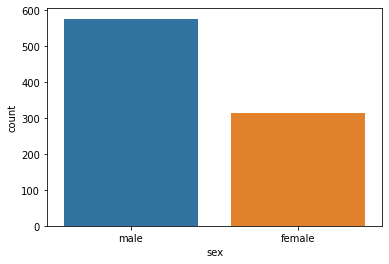

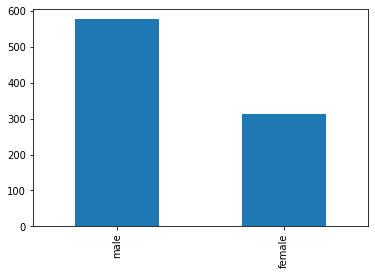

   embarked  Ratio
S       644 72.278
C       168 18.855
Q        77  8.642
#########################################


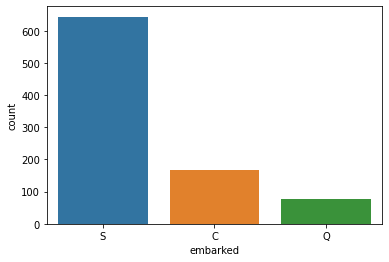

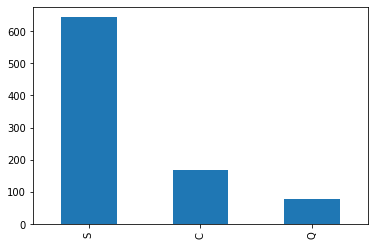

        class  Ratio
Third     491 55.107
First     216 24.242
Second    184 20.651
#########################################


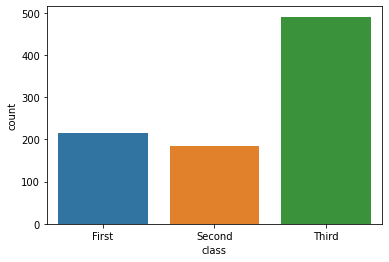

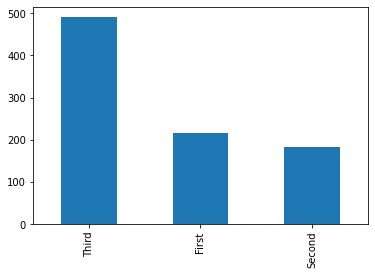

       who  Ratio
man    537 60.269
woman  271 30.415
child   83  9.315
#########################################


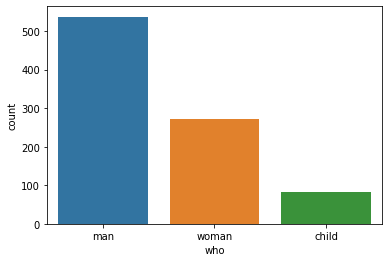

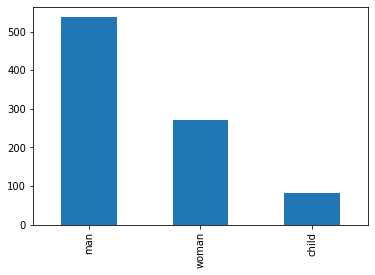

   adult_male  Ratio
1         537 60.269
0         354 39.731
#########################################


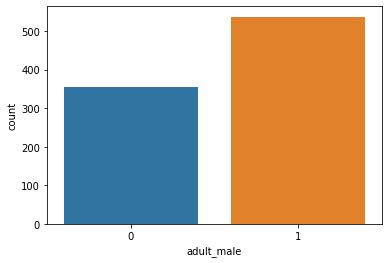

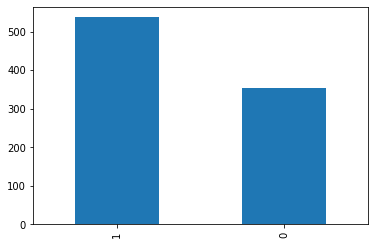

   deck  Ratio
C    59  6.622
B    47  5.275
D    33  3.704
E    32  3.591
A    15  1.684
F    13  1.459
G     4  0.449
#########################################


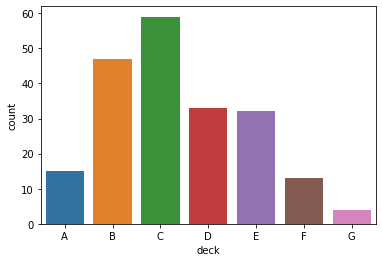

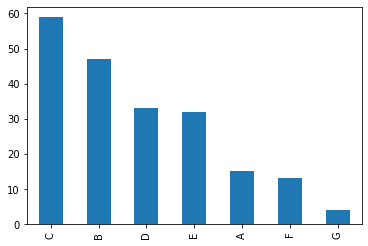

             embark_town  Ratio
Southampton          644 72.278
Cherbourg            168 18.855
Queenstown            77  8.642
#########################################


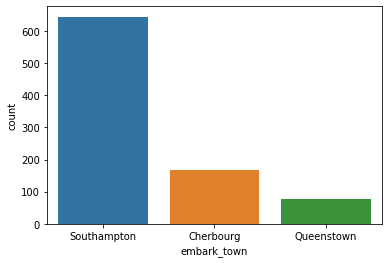

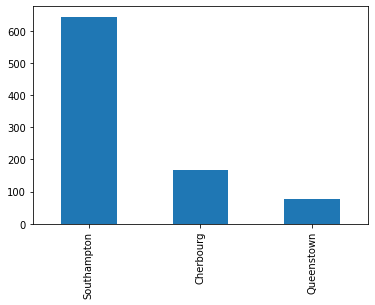

     alive  Ratio
no     549 61.616
yes    342 38.384
#########################################


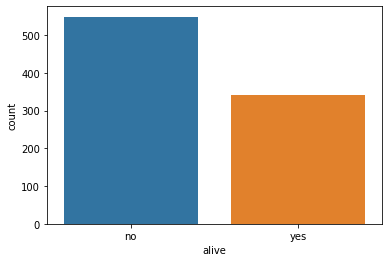

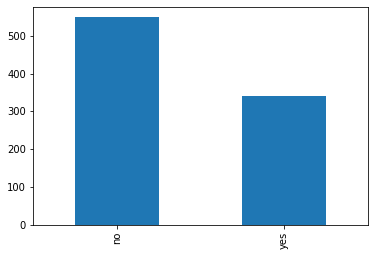

   alone  Ratio
1    537 60.269
0    354 39.731
#########################################


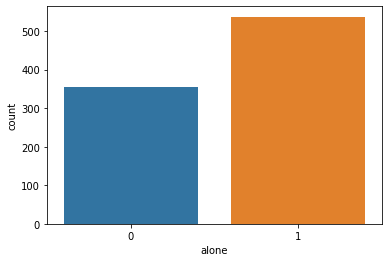

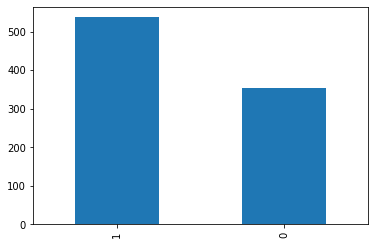

   survived  Ratio
0       549 61.616
1       342 38.384
#########################################


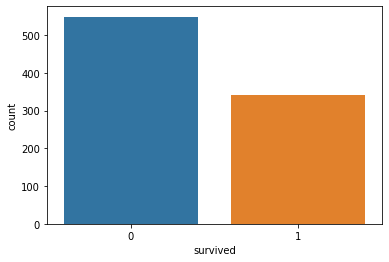

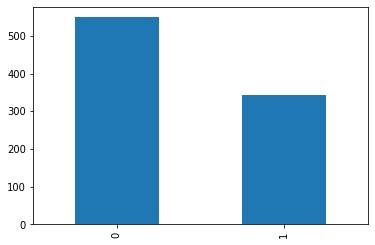

   pclass  Ratio
3     491 55.107
1     216 24.242
2     184 20.651
#########################################


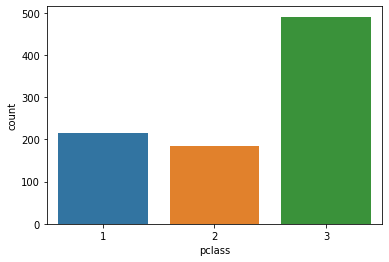

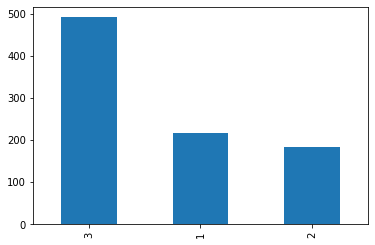

   sibsp  Ratio
0    608 68.238
1    209 23.457
2     28  3.143
4     18  2.020
3     16  1.796
8      7  0.786
5      5  0.561
#########################################


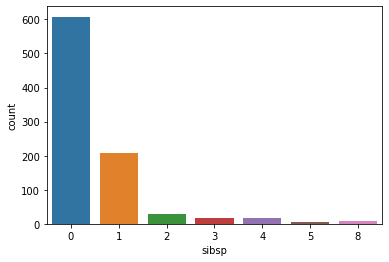

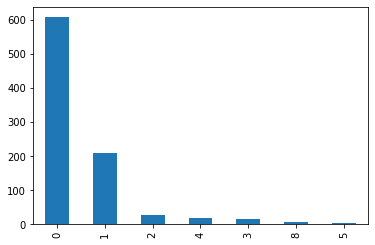

   parch  Ratio
0    678 76.094
1    118 13.244
2     80  8.979
5      5  0.561
3      5  0.561
4      4  0.449
6      1  0.112
#########################################


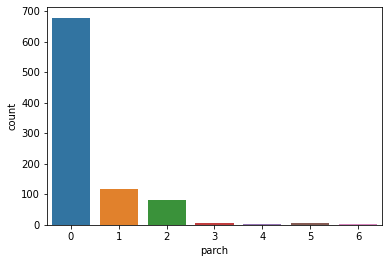

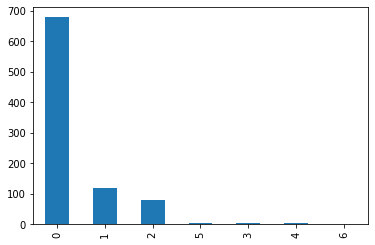

In [527]:
for col in cat_cols:
  if df[col].dtypes == "bool":
    df[col] = df[col].astype(int)
    cat_summary(df, col, plot1=True, plot2=True)
  else:
    cat_summary(df, col, plot1=True, plot2=True)

# **Ödev 2: Pandas Alıştırmalar**

## **Öncesin de gerekli kütüphaneleri yükleyelim ve çıktı görüntüsü için bazı ayarlar yapalım.**

In [528]:
# Numerik hesaplamalar yapabilmek için.
import numpy as np

# Ver manipülasyonu ve analizi için.
import pandas as pd

# Veri setleri ve grafik çizdirmek için.
import seaborn as sns

# Grafik çizdirmek için.
import matplotlib.pyplot as plt

# Çıktı Ayarlamaları İçin
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.float_format", lambda x: "%3.f" % x)
pd.options.display.float_format = '{:,.3f}'.format
pd.set_option("display.width", 5000)

## **Görev 1:**

Seaborn kütüphanesi içerisinden Titanic veri setini tanımlayınız.

In [529]:
df = sns.load_dataset("titanic")

In [530]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.000,1,0,7.250,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.000,1,0,71.283,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.000,0,0,7.925,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.000,1,0,53.100,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.000,0,0,8.050,S,Third,man,True,NaN,Southampton,no,True


## **Görev 2:**

Titanic veri setindeki kadın ve erkek yolcuların sayısını bulunuz.

In [531]:
df["sex"].value_counts()

male      577
female    314
Name: sex, dtype: int64

## **Görev 3:**

Her bir sutuna ait unique değerlerin sayısını bulunuz.

In [532]:
df.nunique()

survived         2
pclass           3
sex              2
age             88
sibsp            7
parch            7
fare           248
embarked         3
class            3
who              3
adult_male       2
deck             7
embark_town      3
alive            2
alone            2
dtype: int64

## **Görev 4:**

pclass değişkeninin unique değerlerinin sayısını bulunuz.

In [533]:
df["pclass"].nunique()

3

## **Görev 5:**

pclass ve parch değişkenlerinin unique değerlerinin sayısını bulunuz.

In [534]:
df[["pclass", "parch"]].nunique()

pclass    3
parch     7
dtype: int64

## **Görev 6:**

embarked değişkeninin tipini kontrol ediniz. Tipini category olarak değiştiriniz ve tekrar kontrol ediniz.

In [535]:
df["embarked"].dtypes

dtype('O')

* Yukarıda görüldüğü üzere Object olan veri tipini Category olarak güncelleyelim.

In [536]:
df["embarked"] = df["embarked"].astype("category")

In [537]:
df["embarked"].dtypes

CategoricalDtype(categories=['C', 'Q', 'S'], ordered=False)

## **Görev 7:**

embarked değeri C olanların tüm bilgelerini gösteriniz.

In [538]:
df[df["embarked"] == "C"]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.000,1,0,71.283,C,First,woman,False,C,Cherbourg,yes,False
9,1,2,female,14.000,1,0,30.071,C,Second,child,False,NaN,Cherbourg,yes,False
19,1,3,female,NaN,0,0,7.225,C,Third,woman,False,NaN,Cherbourg,yes,True
26,0,3,male,NaN,0,0,7.225,C,Third,man,True,NaN,Cherbourg,no,True
30,0,1,male,40.000,0,0,27.721,C,First,man,True,NaN,Cherbourg,no,True
31,1,1,female,NaN,1,0,146.521,C,First,woman,False,B,Cherbourg,yes,False
34,0,1,male,28.000,1,0,82.171,C,First,man,True,NaN,Cherbourg,no,False
36,1,3,male,NaN,0,0,7.229,C,Third,man,True,NaN,Cherbourg,yes,True
39,1,3,female,14.000,1,0,11.242,C,Third,child,False,NaN,Cherbourg,yes,False
42,0,3,male,NaN,0,0,7.896,C,Third,man,True,NaN,Cherbourg,no,True


## **Görev 8:**

embarked değeri S olmayanların tüm bilgelerini gösteriniz.

In [539]:
df[~(df["embarked"] == "S")]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.000,1,0,71.283,C,First,woman,False,C,Cherbourg,yes,False
5,0,3,male,NaN,0,0,8.458,Q,Third,man,True,NaN,Queenstown,no,True
9,1,2,female,14.000,1,0,30.071,C,Second,child,False,NaN,Cherbourg,yes,False
16,0,3,male,2.000,4,1,29.125,Q,Third,child,False,NaN,Queenstown,no,False
19,1,3,female,NaN,0,0,7.225,C,Third,woman,False,NaN,Cherbourg,yes,True
22,1,3,female,15.000,0,0,8.029,Q,Third,child,False,NaN,Queenstown,yes,True
26,0,3,male,NaN,0,0,7.225,C,Third,man,True,NaN,Cherbourg,no,True
28,1,3,female,NaN,0,0,7.879,Q,Third,woman,False,NaN,Queenstown,yes,True
30,0,1,male,40.000,0,0,27.721,C,First,man,True,NaN,Cherbourg,no,True
31,1,1,female,NaN,1,0,146.521,C,First,woman,False,B,Cherbourg,yes,False


## **Görev 9:**

Yaşı 30 dan küçük ve kadın olan yolcuların tüm bilgilerini gösteriniz.

In [540]:
df[(df["age"] < 30) &  (df["sex"] == "female")]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
2,1,3,female,26.000,0,0,7.925,S,Third,woman,False,NaN,Southampton,yes,True
8,1,3,female,27.000,0,2,11.133,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.000,1,0,30.071,C,Second,child,False,NaN,Cherbourg,yes,False
10,1,3,female,4.000,1,1,16.700,S,Third,child,False,G,Southampton,yes,False
14,0,3,female,14.000,0,0,7.854,S,Third,child,False,NaN,Southampton,no,True
22,1,3,female,15.000,0,0,8.029,Q,Third,child,False,NaN,Queenstown,yes,True
24,0,3,female,8.000,3,1,21.075,S,Third,child,False,NaN,Southampton,no,False
38,0,3,female,18.000,2,0,18.000,S,Third,woman,False,NaN,Southampton,no,False
39,1,3,female,14.000,1,0,11.242,C,Third,child,False,NaN,Cherbourg,yes,False
41,0,2,female,27.000,1,0,21.000,S,Second,woman,False,NaN,Southampton,no,False


## **Görev 10:**

Fare'i 500'den büyük veya yaşı 70’den büyük yolcuların bilgilerini gösteriniz.

In [541]:
df[(df["fare"] > 500) | (df["age"] < 70)]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.000,1,0,7.250,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.000,1,0,71.283,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.000,0,0,7.925,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.000,1,0,53.100,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.000,0,0,8.050,S,Third,man,True,NaN,Southampton,no,True
6,0,1,male,54.000,0,0,51.862,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.000,3,1,21.075,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.000,0,2,11.133,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.000,1,0,30.071,C,Second,child,False,NaN,Cherbourg,yes,False
10,1,3,female,4.000,1,1,16.700,S,Third,child,False,G,Southampton,yes,False


## **Görev 11:**

Her bir değişkendeki boş değerlerin toplamını bulunuz.

In [542]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

## **Görev 12:**

 who değişkenini dataframe’den çıkarınız.

In [543]:
df.drop("who", axis=1)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.000,1,0,7.250,S,Third,True,NaN,Southampton,no,False
1,1,1,female,38.000,1,0,71.283,C,First,False,C,Cherbourg,yes,False
2,1,3,female,26.000,0,0,7.925,S,Third,False,NaN,Southampton,yes,True
3,1,1,female,35.000,1,0,53.100,S,First,False,C,Southampton,yes,False
4,0,3,male,35.000,0,0,8.050,S,Third,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.458,Q,Third,True,NaN,Queenstown,no,True
6,0,1,male,54.000,0,0,51.862,S,First,True,E,Southampton,no,True
7,0,3,male,2.000,3,1,21.075,S,Third,False,NaN,Southampton,no,False
8,1,3,female,27.000,0,2,11.133,S,Third,False,NaN,Southampton,yes,False
9,1,2,female,14.000,1,0,30.071,C,Second,False,NaN,Cherbourg,yes,False


## **Görev 13:**

deck değişkenindeki boş değerleri deck değişkenin en çok tekrar eden değeri (mode) ile doldurunuz.

In [544]:
df[["deck"]].fillna(df["deck"].mode()[0], axis=1)

,deck
0,C
1,C
2,C
3,C
4,C
5,C
6,E
7,C
8,C
9,C


## **Görev 14:**

age değikenindeki boş değerleri age değişkenin medyanı ile doldurunuz.

In [545]:
df[["age"]].fillna(df["age"].median(), axis=1)

,age
0,22.000
1,38.000
2,26.000
3,35.000
4,35.000
5,28.000
6,54.000
7,2.000
8,27.000
9,14.000


## **Görev 15:**

survived değişkeninin pclass ve cinsiyet değişkenleri kırılımınında sum, count, mean değerlerini bulunuz.

In [546]:
df.groupby(["pclass", "sex"]).agg({"survived": ["sum", "count", "mean"]})

survived            
                   sum count  mean
pclass sex                        
1      female       91    94 0.968
       male         45   122 0.369
2      female       70    76 0.921
       male         17   108 0.157
3      female       72   144 0.500
       male         47   347 0.135

## **Görev 16:**

30 yaşın altında olanlar 1, 30'a eşit ve üstünde olanlara 0 verecek bir fonksiyon yazın. Yazdığınız fonksiyonu kullanarak titanik veri
setinde age_flag adında bir değişken oluşturunuz. (apply ve lambda yapılarını kullanınız)

In [547]:
new_variable = df["age"].apply(lambda x: 1 if x < 30 else 0)
df["age_flag"] = new_variable

## **Görev Extra:**

 Cinsiyeti erkek olanlara "ERKEK", cinsiyeti kadın olanlara "KADIN" yazsın. Değişken ismi ise new_sex

In [548]:
new_sex = df["sex"].apply(lambda x: "ERKEK" if x == "male" else "KADIN")
df["new_sex"] = new_sex

In [549]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_flag,new_sex
0,0,3,male,22.000,1,0,7.250,S,Third,man,True,NaN,Southampton,no,False,1,ERKEK
1,1,1,female,38.000,1,0,71.283,C,First,woman,False,C,Cherbourg,yes,False,0,KADIN
2,1,3,female,26.000,0,0,7.925,S,Third,woman,False,NaN,Southampton,yes,True,1,KADIN
3,1,1,female,35.000,1,0,53.100,S,First,woman,False,C,Southampton,yes,False,0,KADIN
4,0,3,male,35.000,0,0,8.050,S,Third,man,True,NaN,Southampton,no,True,0,ERKEK


## **Görev 17:**

Seaborn kütüphanesi içerisinden Tips veri setini tanımlayınız.

In [550]:
dff = sns.load_dataset("tips")

In [551]:
dff.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.990,1.010,Female,No,Sun,Dinner,2
1,10.340,1.660,Male,No,Sun,Dinner,3
2,21.010,3.500,Male,No,Sun,Dinner,3
3,23.680,3.310,Male,No,Sun,Dinner,2
4,24.590,3.610,Female,No,Sun,Dinner,4


## **Görev 18:**

Time değişkeninin kategorilerine (Dinner, Lunch) göre total_bill değerinin sum, min, max ve mean değerlerini bulunuz.

In [552]:
dff.groupby("time").agg({"total_bill": ["sum", "min", "max", "mean"]})

total_bill                    
              sum   min    max   mean
time                                 
Lunch   1,167.470 7.510 43.110 17.169
Dinner  3,660.300 3.070 50.810 20.797

## **Görev 19:**

Day ve time’a göre total_bill değerlerinin sum, min, max ve mean değerlerini bulunuz.

In [553]:
dff.groupby(["day", "time"]).agg({"total_bill": ["sum", "min", "max", "mean"]})

total_bill                     
                   sum    min    max   mean
day  time                                  
Thur Lunch   1,077.550  7.510 43.110 17.665
     Dinner     18.780 18.780 18.780 18.780
Fri  Lunch      89.920  8.580 16.270 12.846
     Dinner    235.960  5.750 40.170 19.663
Sat  Lunch       0.000    NaN    NaN    NaN
     Dinner  1,778.400  3.070 50.810 20.441
Sun  Lunch       0.000    NaN    NaN    NaN
     Dinner  1,627.160  7.250 48.170 21.410

## **Görev 20:**

Lunch zamanına ve kadın müşterilere ait total_bill ve tip değerlerinin day'e göre sum, min, max ve mean değerlerini bulunuz.

In [554]:
dff[(dff["time"] == "Lunch") & (dff["sex"] == "Female")].groupby("day").agg({"total_bill": ["sum", "min", "max", "mean"], 
                                                                             "tip":["sum", "min", "max", "mean"]})

total_bill                         tip                  
            sum    min    max   mean    sum   min   max  mean
day                                                          
Thur    516.110  8.350 43.110 16.649 79.420 1.250 5.170 2.562
Fri      55.760 10.090 16.270 13.940 10.980 2.000 3.480 2.745
Sat       0.000    NaN    NaN    NaN  0.000   NaN   NaN   NaN
Sun       0.000    NaN    NaN    NaN  0.000   NaN   NaN   NaN

**Görev 21:**

size'i 3'ten küçük, total_bill'i 10'dan büyük olan siparişlerin ortalaması nedir? (loc kullanınız)

In [555]:
dff.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.990,1.010,Female,No,Sun,Dinner,2
1,10.340,1.660,Male,No,Sun,Dinner,3
2,21.010,3.500,Male,No,Sun,Dinner,3
3,23.680,3.310,Male,No,Sun,Dinner,2
4,24.590,3.610,Female,No,Sun,Dinner,4


In [556]:
dff.loc[(dff["size"] < 3) & (dff["total_bill"] > 10), : "total_bill"].mean()

total_bill   17.185
dtype: float64

## **Görev 22:**

total_bill_tip_sum adında yeni bir değişken oluşturunuz. Her bir müşterinin ödediği total_bill ve tip in toplamını versin.

In [557]:
dff["total_bill_tip_sum"] = dff["total_bill"] + dff["tip"]

In [558]:
dff.head()

,total_bill,tip,sex,smoker,day,time,size,total_bill_tip_sum
0,16.990,1.010,Female,No,Sun,Dinner,2,18.000
1,10.340,1.660,Male,No,Sun,Dinner,3,12.000
2,21.010,3.500,Male,No,Sun,Dinner,3,24.510
3,23.680,3.310,Male,No,Sun,Dinner,2,26.990
4,24.590,3.610,Female,No,Sun,Dinner,4,28.200


## **Görev 23:**

Total_bill değişkeninin kadın ve erkek için ayrı ayrı ortalamasını bulunuz. Bulduğunuz ortalamaların altında olanlara 0, üstünde ve eşit
olanlara 1 verildiği yeni bir total_bill_flag değişkeni oluşturunuz.
Kadınlar için Female olanlarının ortalamaları, erkekler için ise Male olanların ortalamaları dikkate alınacktır. Parametre olarak cinsiyet ve total_bill
alan bir fonksiyon yazarak başlayınız. (If-else koşulları içerecek)

In [559]:
female_mean = dff.groupby("sex")["total_bill"].mean()[1]
man_mean = dff.groupby("sex")["total_bill"].mean()[0]

def fonco(sex, total_bill):
  if sex == "Female" and total_bill < female_mean:
    return 0
  elif sex == "Female" and total_bill >= female_mean:
    return 1
  elif sex == "Male" and total_bill < man_mean:
    return 0
  elif sex == "Male" and total_bill >= man_mean:
    return 1

dff["total_bill_flag"] = dff.apply(lambda x: fonco(x.sex, x.total_bill), axis=1)



In [560]:
dff.head()

,total_bill,tip,sex,smoker,day,time,size,total_bill_tip_sum,total_bill_flag
0,16.990,1.010,Female,No,Sun,Dinner,2,18.000,0
1,10.340,1.660,Male,No,Sun,Dinner,3,12.000,0
2,21.010,3.500,Male,No,Sun,Dinner,3,24.510,1
3,23.680,3.310,Male,No,Sun,Dinner,2,26.990,1
4,24.590,3.610,Female,No,Sun,Dinner,4,28.200,1


## **Görev 24:**

total_bill_flag değişkenini kullanarak cinsiyetlere göre ortalamanın altında ve üstünde olanların sayısını gözlemleyiniz.
* Ortalamanın altında kalan değerler.

In [561]:
dff[dff["total_bill_flag"] == 0]

,total_bill,tip,sex,smoker,day,time,size,total_bill_tip_sum,total_bill_flag
0,16.990,1.010,Female,No,Sun,Dinner,2,18.000,0
1,10.340,1.660,Male,No,Sun,Dinner,3,12.000,0
6,8.770,2.000,Male,No,Sun,Dinner,2,10.770,0
8,15.040,1.960,Male,No,Sun,Dinner,2,17.000,0
9,14.780,3.230,Male,No,Sun,Dinner,2,18.010,0
10,10.270,1.710,Male,No,Sun,Dinner,2,11.980,0
12,15.420,1.570,Male,No,Sun,Dinner,2,16.990,0
13,18.430,3.000,Male,No,Sun,Dinner,4,21.430,0
14,14.830,3.020,Female,No,Sun,Dinner,2,17.850,0
16,10.330,1.670,Female,No,Sun,Dinner,3,12.000,0


* Ortalamanın üstünde kalan değerler.

In [562]:
dff[dff["total_bill_flag"] == 1]

,total_bill,tip,sex,smoker,day,time,size,total_bill_tip_sum,total_bill_flag
2,21.010,3.500,Male,No,Sun,Dinner,3,24.510,1
3,23.680,3.310,Male,No,Sun,Dinner,2,26.990,1
4,24.590,3.610,Female,No,Sun,Dinner,4,28.200,1
5,25.290,4.710,Male,No,Sun,Dinner,4,30.000,1
7,26.880,3.120,Male,No,Sun,Dinner,4,30.000,1
11,35.260,5.000,Female,No,Sun,Dinner,4,40.260,1
15,21.580,3.920,Male,No,Sun,Dinner,2,25.500,1
21,20.290,2.750,Female,No,Sat,Dinner,2,23.040,1
23,39.420,7.580,Male,No,Sat,Dinner,4,47.000,1
28,21.700,4.300,Male,No,Sat,Dinner,2,26.000,1


## **Görev 25:**

Veriyi total_bill_tip_sum değişkenine göre büyükten küçüğe sıralayınız ve ilk 30 kişiyi yeni bir dataframe'e atayınız.

In [563]:
new_data_frame = pd.DataFrame(dff["total_bill_tip_sum"].sort_values().head(30))

In [564]:
new_data_frame

,total_bill_tip_sum
67,4.070
92,6.750
111,8.250
195,9.000
218,9.180
149,9.510
135,9.760
145,9.850
126,10.000
222,10.500


# **Proje: Kural Tabanlı Sınıflandırma ile Potansiyel Müşteri Getirisi Hesaplama**

## **İş Problemi**

Bir oyun şirketi müşterilerinin bazı özelliklerini kullanarak
seviye tabanlı (level based) yeni müşteri tanımları (persona)
oluşturmak ve bu yeni müşteri tanımlarına göre segmentler
oluşturup bu segmentlere göre yeni gelebilecek müşterilerin
şirkete ortalama ne kadar kazandırabileceğini tahmin etmek
istemektedir.

**Örneğin:**

Türkiye’den IOS kullanıcısı olan 25 yaşındaki bir erkek
kullanıcının ortalama ne kadar kazandırabileceği belirlenmek
isteniyor.

## **Veri Seti Hikayesi**

Persona.csv veri seti uluslararası bir oyun şirketinin sattığı ürünlerin fiyatlarını ve bu
ürünleri satın alan kullanıcıların bazı demografik bilgilerini barındırmaktadır. Veri
seti her satış işleminde oluşan kayıtlardan meydana gelmektedir. Bunun anlamı
tablo tekilleştirilmemiştir. Diğer bir ifade ile belirli demografik özelliklere sahip bir
kullanıcı birden fazla alışveriş yapmış olabilir.

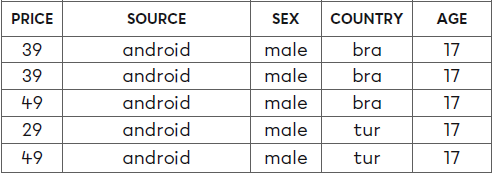

## **Değişkenler**

**persona.csv**

* PRICE – Müşterinin harcama tutarı

* SOURCE – Müşterinin bağlandığı cihaz türü

* SEX – Müşterinin cinsiyeti

* COUNTRY – Müşterinin ülkesi

* AGE – Müşterinin yaşı

## **Proje Görevleri**

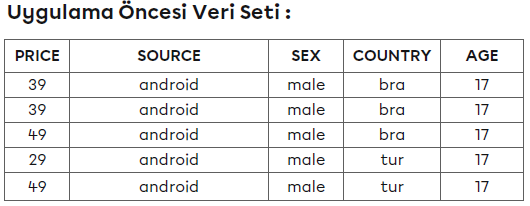

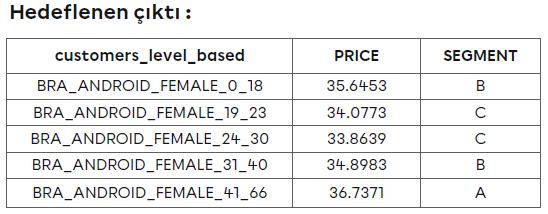

## **Görev 1:**

Aşağıdaki Soruları Yanıtlayınız

#### **Soru 1:**

persona.csv dosyasını okutunuz ve veri seti ile ilgili genel bilgileri gösteriniz.

In [565]:
df = pd.read_csv("/content/persona.csv")

İlk beş gözlemine bakalım.

In [566]:
df.head()

,PRICE,SOURCE,SEX,COUNTRY,AGE
0,39,android,male,bra,17
1,39,android,male,bra,17
2,49,android,male,bra,17
3,29,android,male,tur,17
4,49,android,male,tur,17


Son beş gözlemine bakalım.

In [567]:
df.tail()

,PRICE,SOURCE,SEX,COUNTRY,AGE
4995,29,android,female,bra,31
4996,29,android,female,bra,31
4997,29,android,female,bra,31
4998,39,android,female,bra,31
4999,29,android,female,bra,31


In [568]:
df.shape

(5000, 5)

Veri seti hakkında genel bilgi edinelim.

In [569]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   PRICE    5000 non-null   int64 
 1   SOURCE   5000 non-null   object
 2   SEX      5000 non-null   object
 3   COUNTRY  5000 non-null   object
 4   AGE      5000 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 234.4+ KB


Veri seti içindeki sayısal değişkenlerin betimsel istatistiklerine bakalım.

In [570]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PRICE,"5,000.000",34.132,12.465,9.000,29.000,39.000,39.000,59.000
AGE,"5,000.000",23.581,8.996,15.000,17.000,21.000,27.000,66.000


Veri seti içinde en az bir tane eksik değer var mı diye soralım.

In [571]:
df.isnull().values.any()

False

Değişken bazında eksik değer toplamı.

In [572]:
df.isnull().sum()

PRICE      0
SOURCE     0
SEX        0
COUNTRY    0
AGE        0
dtype: int64

### **Soru 2:**

Kaç unique SOURCE vardır? Frekansları nedir?

In [573]:
df["SOURCE"].nunique()

2

In [574]:
df["SOURCE"].value_counts()

android    2974
ios        2026
Name: SOURCE, dtype: int64

### **Soru 3:**

Kaç unique PRICE vardır?

In [575]:
df["PRICE"].nunique()

6

### **Soru 4:**

Hangi PRICE'dan kaçar tane satış gerçekleşmiş?

In [576]:
df["PRICE"].value_counts()

29    1305
39    1260
49    1031
19     992
59     212
9      200
Name: PRICE, dtype: int64

### **Soru 5:**

Hangi ülkeden kaçar tane satış olmuş?

In [577]:
df["COUNTRY"].value_counts()

usa    2065
bra    1496
deu     455
tur     451
fra     303
can     230
Name: COUNTRY, dtype: int64

### **Soru 6:**

Ülkelere göre satışlardan toplam ne kadar kazanılmış?

In [578]:
df.groupby("COUNTRY").agg({"PRICE": "sum"})

,PRICE
COUNTRY,
bra,51354
can,7730
deu,15485
fra,10177
tur,15689
usa,70225


### **Soru 7:**

SOURCE türlerine göre satış sayıları nedir?

In [579]:
df["SOURCE"].value_counts()

android    2974
ios        2026
Name: SOURCE, dtype: int64

### **Soru 8:**

Ülkelere göre PRICE ortalamaları nedir?

In [580]:
df.groupby("COUNTRY").agg({"PRICE" : "mean"})

,PRICE
COUNTRY,
bra,34.328
can,33.609
deu,34.033
fra,33.587
tur,34.787
usa,34.007


### **Soru 9:**

SOURCE'lara göre PRICE ortalamaları nedir?

In [581]:
df.groupby("SOURCE").agg({"PRICE" : "mean"})

,PRICE
SOURCE,
android,34.175
ios,34.069


### **Soru 10:**

COUNTRY-SOURCE kırılımında PRICE ortalamaları nedir?

In [582]:
df.groupby(["COUNTRY", "SOURCE"]).agg({"PRICE":"mean"})

PRICE
COUNTRY SOURCE        
bra     android 34.387
        ios     34.222
can     android 33.331
        ios     33.951
deu     android 33.870
        ios     34.269
fra     android 34.312
        ios     32.776
tur     android 36.229
        ios     33.273
usa     android 33.760
        ios     34.372

## **Görev 2:**

COUNTRY, SOURCE, SEX, AGE kırılımında ortalama kazançlar nedir?

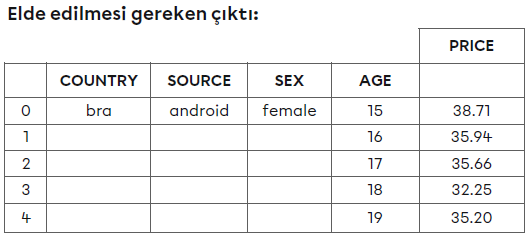

In [583]:
df.groupby(["COUNTRY", "SOURCE", "SEX", "AGE"]).agg({"PRICE":"mean"}).head()

PRICE
COUNTRY SOURCE  SEX    AGE       
bra     android female 15  38.714
                       16  35.944
                       17  35.667
                       18  32.256
                       19  35.207

## **Görev 3:**

Çıktıyı PRICE’a göre sıralayınız.
* Önceki sorudaki çıktıyı daha iyi görebilmek için sort_values metodunu azalan olacak şekilde PRICE’a göre uygulayınız.
* Çıktıyı agg_df olarak kaydediniz.

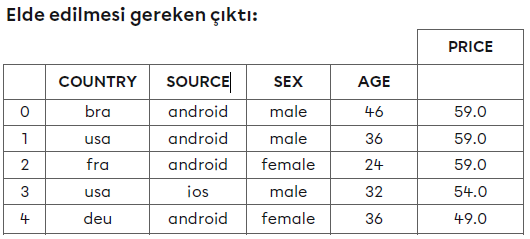

In [584]:
df.groupby(["COUNTRY", "SOURCE", "SEX", "AGE"]).agg({"PRICE":"mean"}).sort_values("PRICE", ascending=False).head()

,,,,PRICE
COUNTRY,SOURCE,SEX,AGE,
bra,android,male,46,59.000
usa,android,male,36,59.000
fra,android,female,24,59.000
usa,ios,male,32,54.000
deu,android,female,36,49.000


Çıktıyı agg_df olarak kaydedelim.

In [585]:
agg_df = df.groupby(["COUNTRY", "SOURCE", "SEX", "AGE"]).agg({"PRICE":"mean"}).sort_values("PRICE", ascending=False)

## **Görev 4:**

* Indekste yer alan isimleri değişken ismine çeviriniz.
* Üçüncü sorunun çıktısında yer alan PRICE dışındaki tüm değişkenler index isimleridir. 
* Bu isimleri değişken isimlerine çeviriniz.

In [586]:
agg_df.head()

,,,,PRICE
COUNTRY,SOURCE,SEX,AGE,
bra,android,male,46,59.000
usa,android,male,36,59.000
fra,android,female,24,59.000
usa,ios,male,32,54.000
deu,android,female,36,49.000


In [587]:
agg_df = agg_df.reset_index()

In [588]:
agg_df.head()

,COUNTRY,SOURCE,SEX,AGE,PRICE
0,bra,android,male,46,59.000
1,usa,android,male,36,59.000
2,fra,android,female,24,59.000
3,usa,ios,male,32,54.000
4,deu,android,female,36,49.000


## **Görev 5:**

Age değişkenini kategorik değişkene çeviriniz ve agg_df’e ekleyiniz.

In [589]:
agg_df["AGE"].dtypes

dtype('int64')

In [590]:
agg_df["AGE"] = agg_df["AGE"].astype("category")

In [591]:
agg_df["AGE"].dtypes

CategoricalDtype(categories=[15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 55, 56, 57, 59, 61, 65, 66], ordered=False)

In [592]:
agg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   COUNTRY  348 non-null    object  
 1   SOURCE   348 non-null    object  
 2   SEX      348 non-null    object  
 3   AGE      348 non-null    category
 4   PRICE    348 non-null    float64 
dtypes: category(1), float64(1), object(3)
memory usage: 12.7+ KB


* Age sayısal değişkenini kategorik değişkene çeviriniz.
* Aralıkları ikna edici şekilde oluşturunuz.
* Örneğin: ‘0_18', ‘19_23', '24_30', '31_40', '41_70'

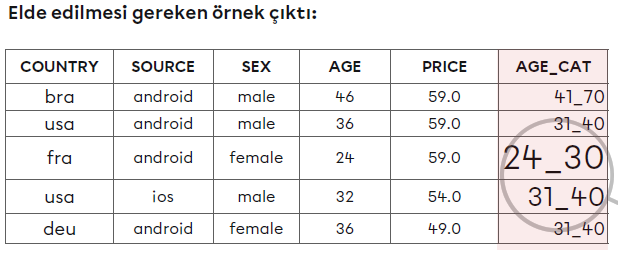

In [593]:
agg_df["AGE_CAT"] = pd.cut(agg_df["AGE"], [0, 18, 23, 30, 40, 70], labels = [ "0_18", "19_23", "24_30", "31_40", "41_70"])

In [594]:
agg_df.head()

,COUNTRY,SOURCE,SEX,AGE,PRICE,AGE_CAT
0,bra,android,male,46,59.000,41_70
1,usa,android,male,36,59.000,31_40
2,fra,android,female,24,59.000,24_30
3,usa,ios,male,32,54.000,31_40
4,deu,android,female,36,49.000,31_40


## **Görev 6:**

Yeni seviye tabanlı müşterileri (persona) tanımlayınız.

* Yeni seviye tabanlı müşterileri (persona) tanımlayınız ve veri setine değişken olarak ekleyiniz.
* Yeni eklenecek değişkenin adı: customers_level_based
* Önceki soruda elde edeceğiniz çıktıdaki gözlemleri bir araya getirerek customers_level_based değişkenini oluşturmanız gerekmektedir.

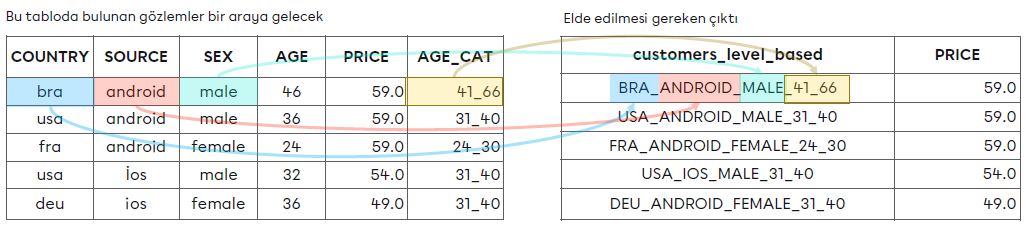

**Dikkat!** List comprehension ile customers_level_based değerleri oluşturulduktan sonra bu değerlerin tekilleştirilmesi gerekmektedir.
Örneğin birden fazla şu ifadeden olabilir: USA_ANDROID_MALE_0_18. Bunları groupby'a alıp price ortalamalarını almak gerekmektedir.

for döngüsü ile yapmak istersek:

In [ ]:
"""
for col in range(len(agg_df)):
  agg_df["customers_level_based"][col] = agg_df["COUNTRY"][col].upper() + "_" + agg_df["SOURCE"][col].upper() + "_" + agg_df["SEX"][col].upper() + "_" + agg_df["AGE_CAT"][col].upper()
"""

List Comprehensions ile yapmak istersek:

In [597]:
agg_df["customers_level_based"] = [agg_df["COUNTRY"][col].upper() + "_" + agg_df["SOURCE"][col].upper() + "_" + agg_df["SEX"][col].upper() + "_" + agg_df["AGE_CAT"][col].upper() for col in range(len(agg_df))]

In [598]:
agg_df.head()

,COUNTRY,SOURCE,SEX,AGE,PRICE,AGE_CAT,customers_level_based
0,bra,android,male,46,59.000,41_70,BRA_ANDROID_MALE_41_70
1,usa,android,male,36,59.000,31_40,USA_ANDROID_MALE_31_40
2,fra,android,female,24,59.000,24_30,FRA_ANDROID_FEMALE_24_30
3,usa,ios,male,32,54.000,31_40,USA_IOS_MALE_31_40
4,deu,android,female,36,49.000,31_40,DEU_ANDROID_FEMALE_31_40


In [600]:
agg_df.groupby("customers_level_based").agg({"PRICE":"mean"})

,PRICE
customers_level_based,
BRA_ANDROID_FEMALE_0_18,35.645
BRA_ANDROID_FEMALE_19_23,34.077
BRA_ANDROID_FEMALE_24_30,33.864
BRA_ANDROID_FEMALE_31_40,34.898
BRA_ANDROID_FEMALE_41_70,36.737
BRA_ANDROID_MALE_0_18,34.806
BRA_ANDROID_MALE_19_23,31.673
BRA_ANDROID_MALE_24_30,33.414
BRA_ANDROID_MALE_31_40,34.327


## **Görev 7:**

Yeni müşterileri (personaları) segmentlere ayırınız.


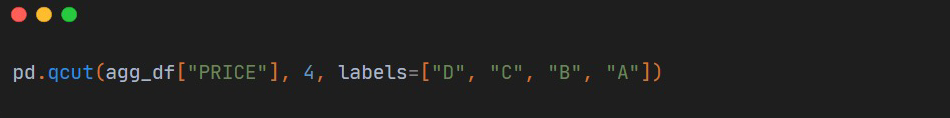

* Yeni müşterileri (Örnek: USA_ANDROID_MALE_0_18) PRICE’a göre 4 segmente ayırınız.
* Segmentleri SEGMENT isimlendirmesi ile değişken olarak agg_df’e ekleyiniz.

In [602]:
agg_df["SEGMENT"] = pd.qcut(agg_df["PRICE"], 4, labels = [ "D", "C", "B", "A"])

In [606]:
agg_df.head()

,COUNTRY,SOURCE,SEX,AGE,PRICE,AGE_CAT,customers_level_based,SEGMENT
0,bra,android,male,46,59.000,41_70,BRA_ANDROID_MALE_41_70,A
1,usa,android,male,36,59.000,31_40,USA_ANDROID_MALE_31_40,A
2,fra,android,female,24,59.000,24_30,FRA_ANDROID_FEMALE_24_30,A
3,usa,ios,male,32,54.000,31_40,USA_IOS_MALE_31_40,A
4,deu,android,female,36,49.000,31_40,DEU_ANDROID_FEMALE_31_40,A


* Segmentleri betimleyiniz (Segmentlere göre group by yapıp price mean, max, sum’larını alınız).

In [608]:
agg_df.groupby("SEGMENT").agg({"PRICE": ["mean", "max", "sum"]})

PRICE                 
          mean    max       sum
SEGMENT                        
D       27.303 31.105 2,375.326
C       32.933 34.000 3,128.667
B       35.436 37.000 2,870.330
A       41.435 59.000 3,521.953

## **Görev 8:**

Yeni gelen müşterileri sınıflandırıp, ne kadar gelir getirebileceklerini tahmin ediniz.


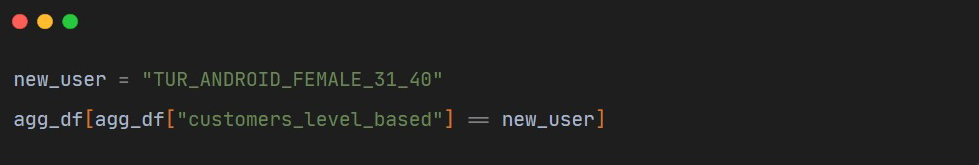

* 33 yaşında ANDROID kullanan bir Türk kadını hangi segmente aittir ve ortalama ne kadar gelir kazandırması beklenir?

In [ ]:
agg_df["customers_level_based"].value_counts()

In [614]:
new_user1 = "TUR_ANDROID_FEMALE_31_40"

In [617]:
agg_df[agg_df["customers_level_based"] == new_user1]

,COUNTRY,SOURCE,SEX,AGE,PRICE,AGE_CAT,customers_level_based,SEGMENT
18,tur,android,female,32,43.000,31_40,TUR_ANDROID_FEMALE_31_40,A
35,tur,android,female,31,40.667,31_40,TUR_ANDROID_FEMALE_31_40,A


Bu değerler ile eşleşen iki müşterimiz olduğu için PRICE değişkeninin ortalamasını alalım.

In [619]:
agg_df[agg_df["customers_level_based"] == new_user1]["PRICE"].mean()

41.83333333333333

* 35 yaşında IOS kullanan bir Fransız kadını hangi segmente aittir ve ortalama ne kadar gelir kazandırması beklenir?

In [621]:
new_user2 = "FRA_IOS_FEMALE_31_40"

In [622]:
agg_df[agg_df["customers_level_based"] == new_user2]

,COUNTRY,SOURCE,SEX,AGE,PRICE,AGE_CAT,customers_level_based,SEGMENT
208,fra,ios,female,40,33.000,31_40,FRA_IOS_FEMALE_31_40,C
221,fra,ios,female,31,32.636,31_40,FRA_IOS_FEMALE_31_40,C


Bu değerler ile eşleşen iki müşterimiz olduğu için PRICE değişkeninin ortalamasını alalım.

In [623]:
agg_df[agg_df["customers_level_based"] == new_user2]["PRICE"].mean()

32.81818181818181